In [117]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from math import factorial, sqrt
import itertools

# Задание 1

In [30]:
def roulette():
    x = np.random.uniform(0, 36)
    return int(x)

print(roulette())

14


# Задание 2

## 1. Сложение / умножение вероятностей

In [60]:
# Сложение вероятностей
# Найти вероятность, что на рулетке выпадет 0 или 3 = 1/37 + 1/37 = 2/37
# Т.е. при 1000 повторениях 0 или 3 должны выпасть примерно 54 раза

k = 0
for i in range(1000):
  x = roulette()
  if x == 0 or x == 3:
    k += 1

print(k)

54


## 2. Гистограмма распределения суммы случайных чисел

[6.633610852662426, 4.997632575499499, 5.454728934953244, 4.065229406840011, 4.18548988089518, 6.36621037993691, 5.9785638059889745, 3.8718045631638187, 5.965392375767125, 5.047342280196383]
5.256600505590357 0.8785419627207945


Text(0.5, 1.0, 'Histogram')

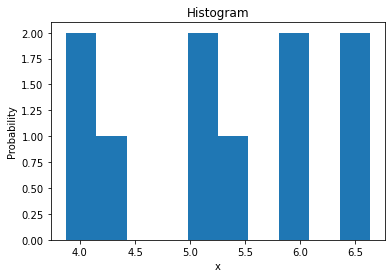

In [76]:
def get_random_list():
  result = []
  for i in range(10):
    x = np.random.rand(10)
    result.append(x.sum())
  return result

x = get_random_list()
print(x)
print(np.mean(x), np.var(x))
num_bins = 10
n, bins, patches = plt.hist(x, num_bins)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram')

# Задание 3

## 1. Монте-Карло

In [93]:
def selection(k,n):
  return factorial(n)/(factorial(k)*factorial(n-k)*(2**n))

def monte_carlo(k, n):
  k_test, n_test = 0, 10000

  x = np.zeros(n_test, dtype='int')
  for i in range(n):
    x += np.random.randint(0, 2, n_test)


  for i in range(0, n_test):
      if x[i] == k:
          k_test += 1
  print(k_test, n_test, k_test/n_test)

monte_carlo(2,4)
selection(2,4)

3712 10000 0.3712


0.375

## 2. Другие значения k, n

In [96]:
monte_carlo(3,12)
selection(3,12)

583 10000 0.0583


0.0537109375

# Задание 4

In [99]:
# Размещения (при len(data) == n - перестановки)
def permutations(data, n):
  for p in itertools.permutations(data,n):
    print(''.join(str(x) for x in p))

 # Сочетания
def combinations(data, n):
  for p in itertools.combinations(data,n):
    print(''.join(p))



In [105]:
permutations('01234', 2)
print('=' * 22)
permutations('012345', 3)
print('=' * 22)
combinations('01234', 2)
print('=' * 22)
combinations('012345', 3)

01
02
03
04
10
12
13
14
20
21
23
24
30
31
32
34
40
41
42
43
012
013
014
015
021
023
024
025
031
032
034
035
041
042
043
045
051
052
053
054
102
103
104
105
120
123
124
125
130
132
134
135
140
142
143
145
150
152
153
154
201
203
204
205
210
213
214
215
230
231
234
235
240
241
243
245
250
251
253
254
301
302
304
305
310
312
314
315
320
321
324
325
340
341
342
345
350
351
352
354
401
402
403
405
410
412
413
415
420
421
423
425
430
431
432
435
450
451
452
453
501
502
503
504
510
512
513
514
520
521
523
524
530
531
532
534
540
541
542
543
01
02
03
04
12
13
14
23
24
34
012
013
014
015
023
024
025
034
035
045
123
124
125
134
135
145
234
235
245
345


# Задание 5

manual corrcoef is 0.8818656627931413
corrcoef from lib 0.8818656627931412
0.6312721464246595 0.1807950246043571
0.6312721464246588 0.18079502460435745


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


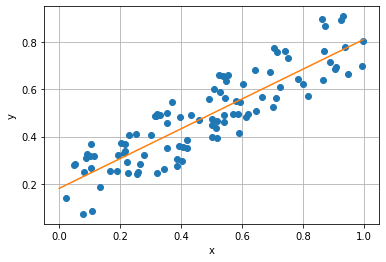

In [121]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]

x_mean = np.mean(x)
y_mean = np.mean(y)
c = np.sum((x - x_mean)*(y - y_mean)) / sqrt(np.sum((x - x_mean)**2)*np.sum((y - y_mean)**2))
C = np.corrcoef(x, y)[0][1]

print(f'manual corrcoef is {c}')
print(f'corrcoef from lib {C}')

print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()